In [2]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
with open('./data/train.pkl','rb') as f:
    data = pickle.load(f)
with open('./data/test.pkl','rb') as f:
    test = pickle.load(f)

In [4]:
random.shuffle(data)

# Preprocess

## Training Set

In [5]:
X_train = data[:,0]
X_train = np.split(X_train,10)
X_train = [ [[j] for j in i] for i in X_train ]
y_train = data[:,1]
y_train = np.split(y_train,10)

In [6]:
X_vec_train = {}
for i in range(1,21):
    X_vec_train["degree " + str(i)] = []
    for j in range(10):
        X_vec_train["degree " + str(i)].append(PolynomialFeatures(i).fit_transform(X_train[j]))

## Testing Set

In [7]:
X_test = test[:,0]
X_test = [ [i] for i in X_test ]
y_test = test[:,1]

In [8]:
X_vec_test = {}
for i in range(1,21):
    X_vec_test["degree " + str(i)] = PolynomialFeatures(i).fit_transform(X_test)

## Train Models

In [9]:
Models = {}
for i in range(1,21):
    Models["degree " + str(i)] = []
    for j in range(10):
        Models["degree " + str(i)].append(LinearRegression().fit(X_vec_train["degree " + str(i)][j], y_train[j]))

## Predictions

In [10]:
f_cap_x = {}
for i in range(1,21):
    f_cap_x["degree " + str(i)] = []
    for j in range(10):
        f_cap_x["degree " + str(i)].append( Models["degree " + str(i)][j].predict(X_vec_test["degree " + str(i)]) )
    f_cap_x["degree " + str(i)] = np.array(f_cap_x["degree " + str(i)])

### Variance

In [11]:
Variance = np.zeros(20)

In [12]:
for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    Variance[idx] = np.mean(np.var(data, axis=0))

In [13]:
avg_f_cap_x = {}
for i in f_cap_x:
    avg_f_cap_x[i] = []
    for j in range(len(f_cap_x[i][0])):
        avg_f_cap_x[i].append( np.mean( f_cap_x[i][:,j] ) )

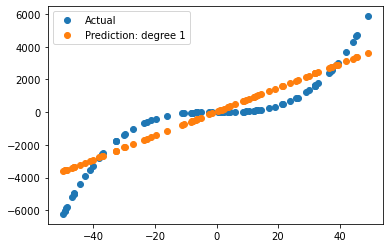

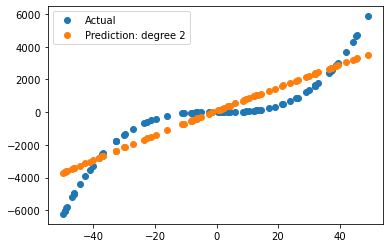

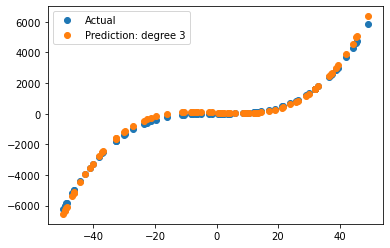

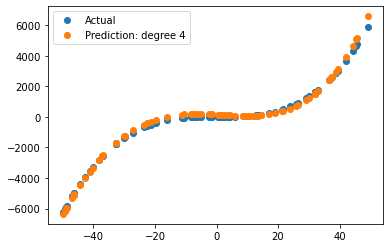

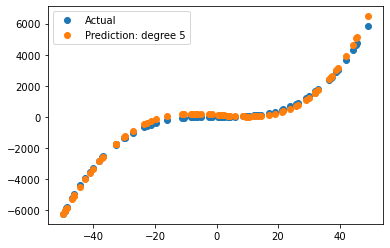

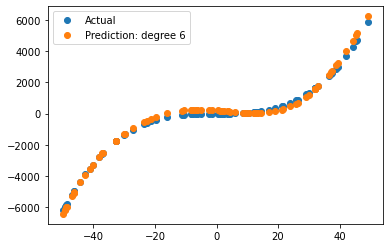

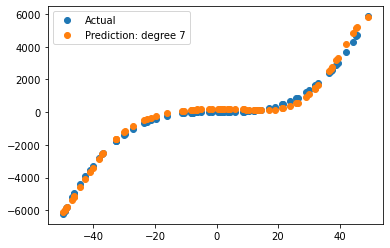

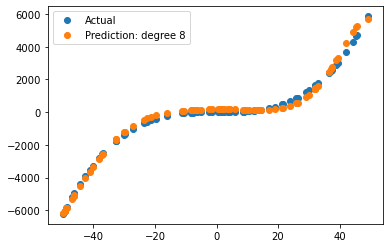

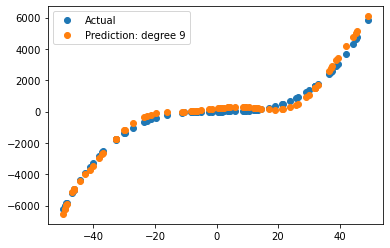

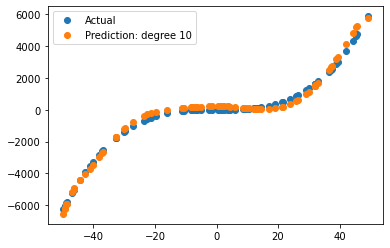

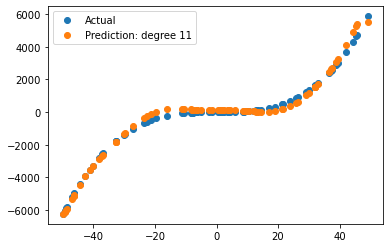

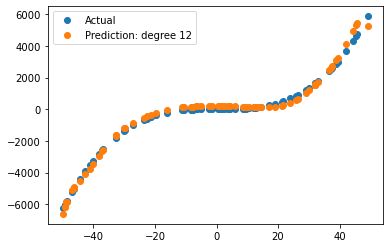

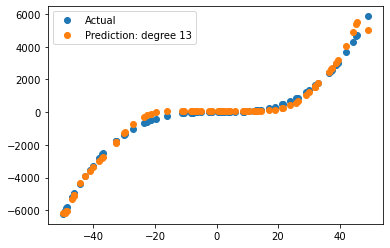

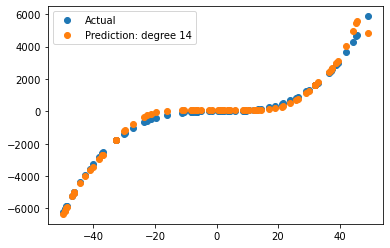

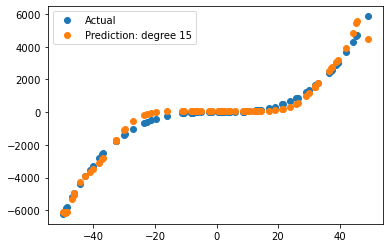

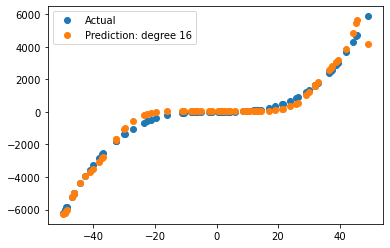

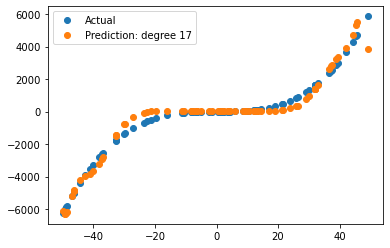

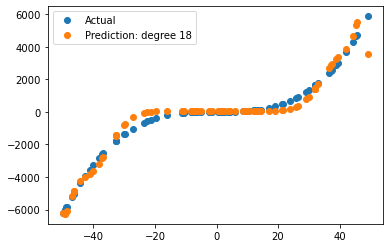

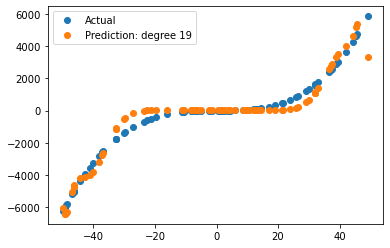

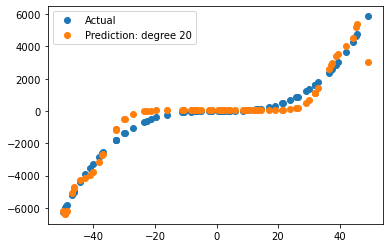

In [14]:
for i in avg_f_cap_x:
    plt.plot( X_test, y_test, "o", label="Actual")
    plt.plot( X_test, avg_f_cap_x[i], "o", label="Prediction: " + i)
    plt.legend()
    plt.show()

### Bias

In [15]:
Bias_2 = np.zeros(20)
Bias = np.zeros(20)

### Error

In [16]:
mse = np.zeros(20)

In [24]:
for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    Bias[idx] = np.mean(abs(np.mean(data, axis = 0) - y_test))
    Bias_2[idx] = np.mean((np.mean(data, axis = 0) - y_test) ** 2)
    
    for i in data:
        mse[idx] += np.mean(np.square(i - y_test))
mse /= 10

## Irreducible Error

In [18]:
irr_err = np.zeros(20)

In [19]:
irr_err = mse - Variance - Bias_2

## Plots

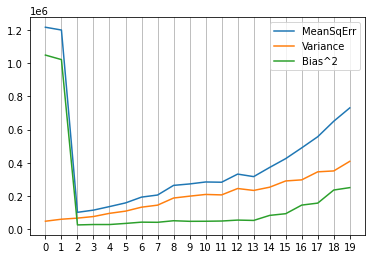

In [51]:
plt.plot(mse, label="MeanSqErr")
plt.plot(Variance, label="Variance")
plt.plot(Bias_2, label="Bias^2")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

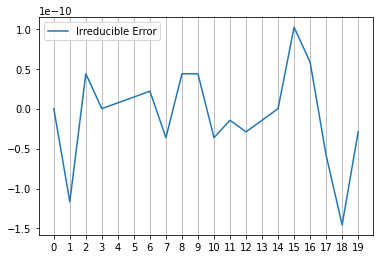

In [50]:
plt.plot(irr_err, label="Irreducible Error")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

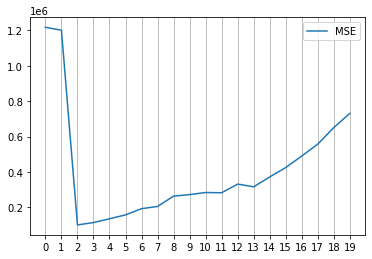

In [49]:
plt.plot(mse, label="MSE")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

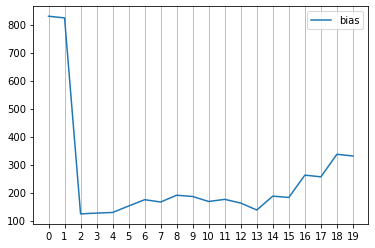

In [43]:
plt.plot(Bias, label="bias")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

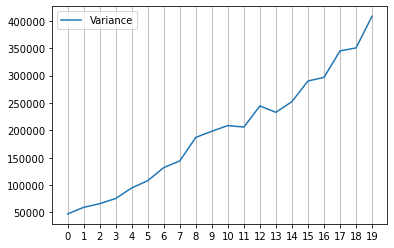

In [44]:
plt.plot(Variance, label="Variance")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

## Tabulation

In [27]:
table = pd.DataFrame({
    "degree": range(1, 21),
    "bias": Bias,
    "variance": Variance
})

In [33]:
table.to_markdown("lol.md")

In [34]:
table

,degree,bias,variance
0,1,829.665695,47264.998297
1,2,823.756017,59334.325485
2,3,123.641345,65952.326640
3,4,126.697154,75499.696878
4,5,128.804331,94805.479392
5,6,151.865749,108005.922002
6,7,174.434955,131947.823242
7,8,166.200915,144141.624160
8,9,190.432911,187108.453452
9,10,185.766165,198378.227529


In [45]:
irr_tab = pd.DataFrame({
    "degree": range(1, 21),
    "Irreducible Error": irr_err
})

In [46]:
irr_tab

,degree,Irreducible Error
0,1,0.000000e+00
1,2,-1.164153e-10
2,3,4.365575e-11
3,4,0.000000e+00
4,5,7.275958e-12
5,6,1.455192e-11
6,7,2.182787e-11
7,8,-3.637979e-11
8,9,4.365575e-11
9,10,4.365575e-11
